# Introduction

Zomato is an Indian restaurant search and discovery service founded in 2008 by Deepinder Goyal and Pankaj Chaddah. It currently operates in 24 countries. It provides information and reviews of restaurants, including images of menus where the restaurant does not have its own website and also online delivery.

# Aim

Our main objective is to see if there is a significant difference between the rating of the restaurants which provide online food ordering option and those who don't. Along with that we will also try to bring out the best budget restaurant and worst fancy restaurants in the city. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

Around 15% of the values in rate column are missing, one reason for that could be that customers sometime don't rate food and services of the restaurants. We can replace the missing values with index interpolation or we can simply put mean rating for the restaurant in the missing blocks but I believe in this scenario dropping missing values is the best choice as we are dealing with food, a person is compelled to give review of a restaurnt if the service is excellent or if he finds service not up to the expectation. We want to consider these opinion in our analyses as we are targeting extreme good or bad.

In [13]:
data=data[data['rate'].notnull()]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 18 columns):
url                            43942 non-null object
address                        43942 non-null object
name                           43942 non-null object
online_order                   43942 non-null object
book_table                     43942 non-null object
rate                           43942 non-null object
votes                          43942 non-null int64
phone                          43110 non-null object
location                       43942 non-null object
rest_type                      43791 non-null object
dish_liked                     23609 non-null object
cuisines                       43931 non-null object
approx_cost(for two people)    43690 non-null object
reviews_list                   43942 non-null object
menu_item                      43942 non-null object
listed_in(type)                43942 non-null object
listed_in(city)                43942 non-nul

In [15]:
data['rating']= data['rate'].str.split('/').str[0]

In [16]:
new_data= data[~data['rating'].str.contains('NEW')]
new_data= new_data[~new_data['rating'].str.contains('-')]


In [17]:
new_data['rating']= new_data['rating'].str.strip().astype('float')

In [18]:
new_data['name'].value_counts()[:5]

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Kanti Sweets         68
Five Star Chicken    68
Name: name, dtype: int64

In [19]:
new_data.groupby('name')['rating'].mean()[:5]

name
#FeelTheROLL                            3.4
#L-81 Cafe                              3.9
#refuel                                 3.7
1000 B.C                                3.2
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C    3.7
Name: rating, dtype: float64

Some restaurant names have series of unusual characters in them like 'Â', I think it is because their name is in regional language Kannada.

In [20]:
local_cuisine= new_data[new_data['name'].str.contains('Â')]

In [21]:
local_cuisine['location'].value_counts()

MG Road                  36
Richmond Road            35
Ulsoor                   31
Residency Road           17
Shivajinagar             16
Koramangala 4th Block    15
HSR                      12
Indiranagar              12
JP Nagar                 10
Marathahalli              9
Lavelle Road              9
BTM                       9
Shanti Nagar              8
Bellandur                 7
Koramangala 7th Block     6
Kalyan Nagar              6
Thippasandra              4
Kumaraswamy Layout        3
Vasanth Nagar             3
Banashankari              3
Hennur                    2
New BEL Road              2
Sarjapur Road             2
Whitefield                2
Name: location, dtype: int64

Most of the ethnic restaurants are at MG Road.

0.5894133175549588

In [20]:
new_data= new_data.drop(['menu_item','phone'],axis=1)

In [24]:
new_data.groupby('rest_type')['votes'].mean()

rest_type
Bakery                             50.545455
Bakery, Beverage Shop               4.000000
Bakery, Cafe                      974.527778
Bakery, Dessert Parlor             93.354331
Bakery, Food Court                 23.000000
Bakery, Quick Bites                52.500000
Bar                               437.483871
Bar, Casual Dining               1150.713924
Bar, Lounge                       500.666667
Bar, Pub                          641.000000
Bar, Quick Bites                 1204.222222
Beverage Shop                      47.042056
Beverage Shop, Cafe                48.428571
Beverage Shop, Dessert Parlor     122.600000
Beverage Shop, Quick Bites        102.937500
Bhojanalya                          6.000000
Cafe                              427.074302
Cafe, Bakery                      234.945205
Cafe, Bar                         401.578947
Cafe, Casual Dining              1952.329480
Cafe, Dessert Parlor              380.173611
Cafe, Food Court                   38.000000


In [23]:
online= new_data.groupby('online_order').mean().reset_index(level=0)

In [28]:
stand= new_data.groupby('online_order').std(ddof=1).reset_index(level=0)

In [29]:
stand

,online_order,votes,rating
0,No,1059.194811,0.467850
1,Yes,770.979241,0.423637


In [30]:
online

,online_order,votes,rating
0,No,367.504253,3.65907
1,Yes,343.228663,3.72244


In [51]:
def twoSampZ(X1, X2, sd1, sd2,mudiff, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt((sd1**2)/n1 + (sd2**2)/n2)
    z =abs( ((X1 - X2) - mudiff)/pooledSE )
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z,3), round(pval,4)

In [46]:

N1= len(new_data[new_data['online_order']=='No'])
N2= len(new_data[new_data['online_order']=='Yes'])

In [52]:
twoSampZ(X1=3.65907,X2=3.72244,sd1=	0.467850,sd2=0.423637,mudiff=0,n1=N1,n2=N2)

(13.593, 0.0)

The p-value suggests that are is a significant difference in the rating of restaurants which have online ordering available and those which don't have such a facility. 

In [21]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 17 columns):
url                            41665 non-null object
address                        41665 non-null object
name                           41665 non-null object
online_order                   41665 non-null object
book_table                     41665 non-null object
rate                           41665 non-null object
votes                          41665 non-null int64
phone                          40851 non-null object
location                       41665 non-null object
rest_type                      41516 non-null object
dish_liked                     23462 non-null object
cuisines                       41654 non-null object
approx_cost(for two people)    41418 non-null object
reviews_list                   41665 non-null object
listed_in(type)                41665 non-null object
listed_in(city)                41665 non-null object
rating                         41665 non-nul

In [25]:
new_data['approx_cost(for two people)']= new_data['approx_cost(for two people)'].str.replace(',','').dropna().astype('int')

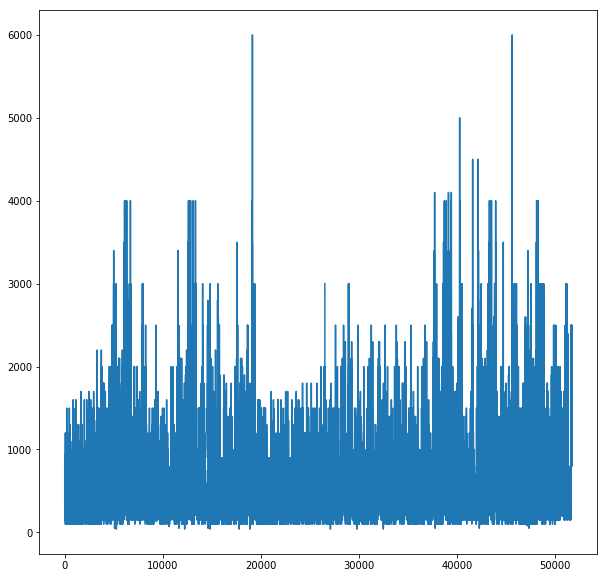

In [26]:
new_data['approx_cost(for two people)'].plot(figsize=(10,10))

In [72]:
grouped_names= new_data.groupby('name').mean()

In [73]:
grouped_names

,votes,approx_cost(for two people),rating
name,,,
#FeelTheROLL,7.000000,200.000000,3.400000
#L-81 Cafe,48.000000,400.000000,3.900000
#refuel,37.000000,400.000000,3.700000
1000 B.C,49.000000,300.000000,3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,41.000000,450.000000,3.700000
11 to 11 Express Biriyanis,22.000000,300.000000,3.500000
1131 Bar + Kitchen,2823.000000,1500.000000,4.500000
12th Main - Grand Mercure,354.100000,2000.000000,4.100000
1441 Pizzeria,132.800000,800.000000,4.100000


In [75]:
best_budget_restuarts= grouped_names[(grouped_names['approx_cost(for two people)'] < 500) & (grouped_names['rating']>4.5)]

In [76]:
best_budget_restuarts

,votes,approx_cost(for two people),rating
name,,,
Belgian Waffle Factory,858.00,400.0,4.844828
CTR,4414.50,150.0,4.750000
Dock Frost'd,115.50,400.0,4.600000
Kurtoskalacs,284.20,390.0,4.620000
Milano Ice Cream,675.75,400.0,4.600000
Mugful Of Stories,274.00,300.0,4.600000
O.G. Variar & Sons,1158.50,200.0,4.800000
Taaza Thindi,651.00,100.0,4.700000
The Blue Wagon - Kitchen,233.40,400.0,4.600000


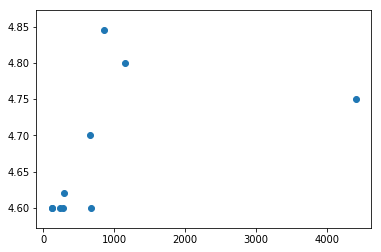

In [80]:
plt.scatter(best_budget_restuarts['votes'].round(), best_budget_restuarts['rating'])

CTR restaurant has a lots of votes. Considering the fact that mean value is highly sensitive to extreme value, the rating of restuarant suggests that the restuarant is consistently good and hosts a lot of guests.

In [77]:
worst_fancy_restuarts= grouped_names[(grouped_names['approx_cost(for two people)'] > 3000)& (grouped_names['rating']<3.5)]

In [78]:
worst_fancy_restuarts

,votes,approx_cost(for two people),rating
name,,,
Grill 99 - The Ritz-Carlton,12.0,4000.0,3.44


Indiranagar is one of the main I.T hubs in the state, I was keen to know what kind of restaurant attracts most number of guests there.

In [31]:
new= new_data[new_data['location']=='Indiranagar'][['rest_type','votes','rating','listed_in(type)']]

In [32]:
Indira= new.groupby('listed_in(type)').mean()

In [33]:
Indira.max()

votes     1999.916667
rating       4.172222
dtype: float64

In [35]:
Indira[Indira['votes']>=1999]

,votes,rating
listed_in(type),,
Buffet,1999.916667,4.172222


In [97]:
Indira['votes'].max()

1999.9166666666667

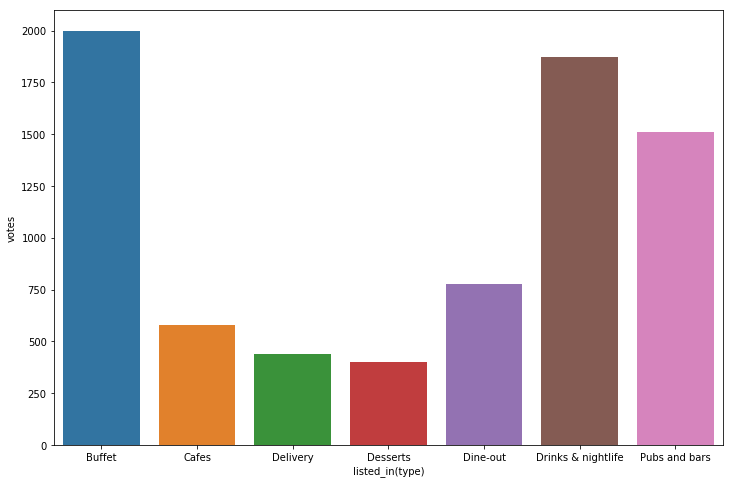

In [108]:
plt.figure(figsize=(12,8))
sns.barplot(Indira.index,Indira['votes'])

This graph clearly shows where people like to hang out more in that area. Next to buffet people are mostly drawn towards the pub culture of the city.